In [1]:
import pandas as pd 
pd.set_option('display.max_columns',30)
pd.set_option('display.max_rows',100)

In [2]:
df=pd.read_csv('/Users/moe/Documents/concordia/Fall2024/comp 333/project /nyc_2017_2019.csv', delimiter=';')

In [15]:
df.columns


Index(['crash_date', 'borough', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'temp', 'precip', 'snow', 'windspeed',
       'conditions'],
      dtype='object')

Dropping unnecessry/irrelavant columns

In [18]:
df_subset = df[[
    'crash_date', 'number_of_persons_injured', 'number_of_persons_killed',
    'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
    'number_of_cyclist_injured', 'number_of_cyclist_killed',
    'number_of_motorist_injured', 'number_of_motorist_killed',
    'temp', 'windspeed', 'conditions'
]]


In [20]:
df_subset=df_subset.drop_duplicates()

checking null values 

In [25]:

df_subset.isna().sum()


crash_date                       0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
temp                             0
windspeed                        0
conditions                       0
dtype: int64

Drop rows with any null values since they only represnt about 1% which is very low


In [28]:
# Drop rows with any null values
df_subset.dropna(inplace=True)
df_subset.isna().sum()


crash_date                       0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
temp                             0
windspeed                        0
conditions                       0
dtype: int64

grouping vehicles into 5 bins( data transormation )

In [32]:
# Step 1: Calculate counts of each vehicle type
vehicle_counts = df_subset['vehicle_type_primary'].value_counts()

# Step 2: Filter types with less than 100 occurrences and set them as "Other Vehicle"
common_vehicle_types = vehicle_counts[vehicle_counts >= 100].index
df_subset['vehicle_group'] = df_subset['vehicle_type_primary'].apply(lambda x: x if x in common_vehicle_types else 'Other Vehicle')

# Step 3: Define mapping for frequent vehicle types to broader categories
vehicle_type_bins = {
    "PASSENGER VEHICLE": "Passenger Vehicle",
    "SPORT UTILITY / STATION WAGON": "Passenger Vehicle",
    "Station Wagon/Sport Utility Vehicle": "Passenger Vehicle",
    "Sedan": "Passenger Vehicle",
    "4 dr sedan": "Passenger Vehicle",
    "TAXI": "Passenger Vehicle",
    "Taxi": "Passenger Vehicle",
    "VAN": "Passenger Vehicle",
    "LIVERY VEHICLE": "Passenger Vehicle",
    "PICK-UP TRUCK": "Passenger Vehicle",
    
    "LARGE COM VEH(6 OR MORE TIRES)": "Commercial Vehicle",
    "BUS": "Commercial Vehicle",
    "SMALL COM VEH(4 TIRES)": "Commercial Vehicle",
    "Box Truck": "Commercial Vehicle",
    "Tractor Truck Diesel": "Commercial Vehicle",
    
    "AMBULANCE": "Emergency Vehicle",
    "FIRE TRUCK": "Emergency Vehicle",
    
    "BICYCLE": "Two-Wheeler",
    "MOTORCYCLE": "Two-Wheeler",
    
    "Other Vehicle": "Other Vehicle"  # Group remaining as "Other Vehicle"
}

# Step 4: Map vehicle groups based on the broader categories
df_subset['vehicle_group'] = df_subset['vehicle_group'].map(vehicle_type_bins).fillna('Other Vehicle')

# Display the resulting DataFrame
df_subset


KeyError: 'vehicle_type_primary'

grouping primary_contributing_factor into 5 bins ( data transformation)

In [35]:
# Define a complete mapping for primary_contributing_factor categories to broader bins
factor_bins = {
    # Driver Behavior
    "Driver Inattention/Distraction": "Driver Behavior",
    "Failure to Yield Right-of-Way": "Driver Behavior",
    "Backing Unsafely": "Driver Behavior",
    "Turning Improperly": "Driver Behavior",
    "Following Too Closely": "Driver Behavior",
    "Traffic Control Disregarded": "Driver Behavior",
    "Driver Inexperience": "Driver Behavior",
    "Passing or Lane Usage Improper": "Driver Behavior",
    "Unsafe Lane Changing": "Driver Behavior",
    "Passing Too Closely": "Driver Behavior",
    "Outside Car Distraction": "Driver Behavior",
    "Alcohol Involvement": "Driver Behavior",
    "Unsafe Speed": "Driver Behavior",
    "Aggressive Driving/Road Rage": "Driver Behavior",
    "Reaction to Uninvolved Vehicle": "Driver Behavior",
    "Passenger Distraction": "Driver Behavior",
    "Reaction to Other Uninvolved Vehicle": "Driver Behavior",
    "Texting": "Driver Behavior",
    "Cell Phone (hands-free)": "Driver Behavior",
    "Cell Phone (hand-held)": "Driver Behavior",

    # Vehicle Issues
    "Brakes Defective": "Vehicle Issues",
    "Oversized Vehicle": "Vehicle Issues",
    "Tire Failure/Inadequate": "Vehicle Issues",
    "Accelerator Defective": "Vehicle Issues",
    "Tow Hitch Defective": "Vehicle Issues",
    "Steering Failure": "Vehicle Issues",
    "Other Vehicular": "Vehicle Issues",
    "Headlights Defective": "Vehicle Issues",
    "Windshield Inadequate": "Vehicle Issues",
    "Other Lighting Defects": "Vehicle Issues",
    "Driverless/Runaway Vehicle": "Vehicle Issues",
    "Traffic Control Device Improper/Non-Working": "Vehicle Issues",

    # Environmental Factors
    "Pavement Slippery": "Environmental Factors",
    "Obstruction/Debris": "Environmental Factors",
    "Lane Marking Improper/Inadequate": "Environmental Factors",
    "Pavement Defective": "Environmental Factors",
    "View Obstructed/Limited": "Environmental Factors",
    "Glare": "Environmental Factors",
    "Animals Action": "Environmental Factors",
    "Tinted Windows": "Environmental Factors",

    # Medical/Physical Factors
    "Fatigued/Drowsy": "Medical/Physical Factors",
    "Lost Consciousness": "Medical/Physical Factors",
    "Prescription Medication": "Medical/Physical Factors",
    "Physical Disability": "Medical/Physical Factors",
    "Fell Asleep": "Medical/Physical Factors",
    "Illness": "Medical/Physical Factors",
    "Illnes": "Medical/Physical Factors",  # Assumed typo
    "Drugs (Illegal)": "Medical/Physical Factors",
    "Drugs (illegal)": "Medical/Physical Factors",

    # Unspecified/Other
    "Unspecified": "Unspecified/Other",
    "Other Electronic Device": "Driver Behavior",
    "Pedestrian/Bicyclist/Other Pedestrian Error/Confusion": "Unspecified/Other",
    "Eating or Drinking": "Driver Behavior",
    "Using On Board Navigation Device": "Driver Behavior",
    "Vehicle Vandalism": "Unspecified/Other",
    "80": "Unspecified/Other",
    "1": "Unspecified/Other"
}

# Apply the mapping to create a new grouped column
df_subset['factor_group'] = df_subset['primary_contributing_factor'].map(factor_bins).fillna('Unspecified/Other')

# Display the modified DataFrame with the new 'factor_group' column
df_subset

KeyError: 'primary_contributing_factor'

dropping the columns : primary_contributing_factor and vevehicle_type_primary since we created 2 new columns 

In [38]:
df_subset.columns
df_subset=df_subset[['date', 'time', 'total_persons_injured', 'total_persons_killed',
       'pedestrians_injured', 'pedestrians_killed', 'cyclists_injured',
       'cyclists_killed', 'motorists_injured', 'motorists_killed', 
       'temperature_avg', 'wind_speed', 'weather_conditions', 'vehicle_group',
       'factor_group']]
df_subset

KeyError: "None of [Index(['date', 'time', 'total_persons_injured', 'total_persons_killed',\n       'pedestrians_injured', 'pedestrians_killed', 'cyclists_injured',\n       'cyclists_killed', 'motorists_injured', 'motorists_killed',\n       'temperature_avg', 'wind_speed', 'weather_conditions', 'vehicle_group',\n       'factor_group'],\n      dtype='object')] are in the [columns]"

visualzing the data to check for outliers 

array([[<Axes: title={'center': 'number_of_persons_injured'}>,
        <Axes: title={'center': 'number_of_persons_killed'}>,
        <Axes: title={'center': 'number_of_pedestrians_injured'}>],
       [<Axes: title={'center': 'number_of_pedestrians_killed'}>,
        <Axes: title={'center': 'number_of_cyclist_injured'}>,
        <Axes: title={'center': 'number_of_cyclist_killed'}>],
       [<Axes: title={'center': 'number_of_motorist_injured'}>,
        <Axes: title={'center': 'number_of_motorist_killed'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'windspeed'}>, <Axes: >, <Axes: >]],
      dtype=object)

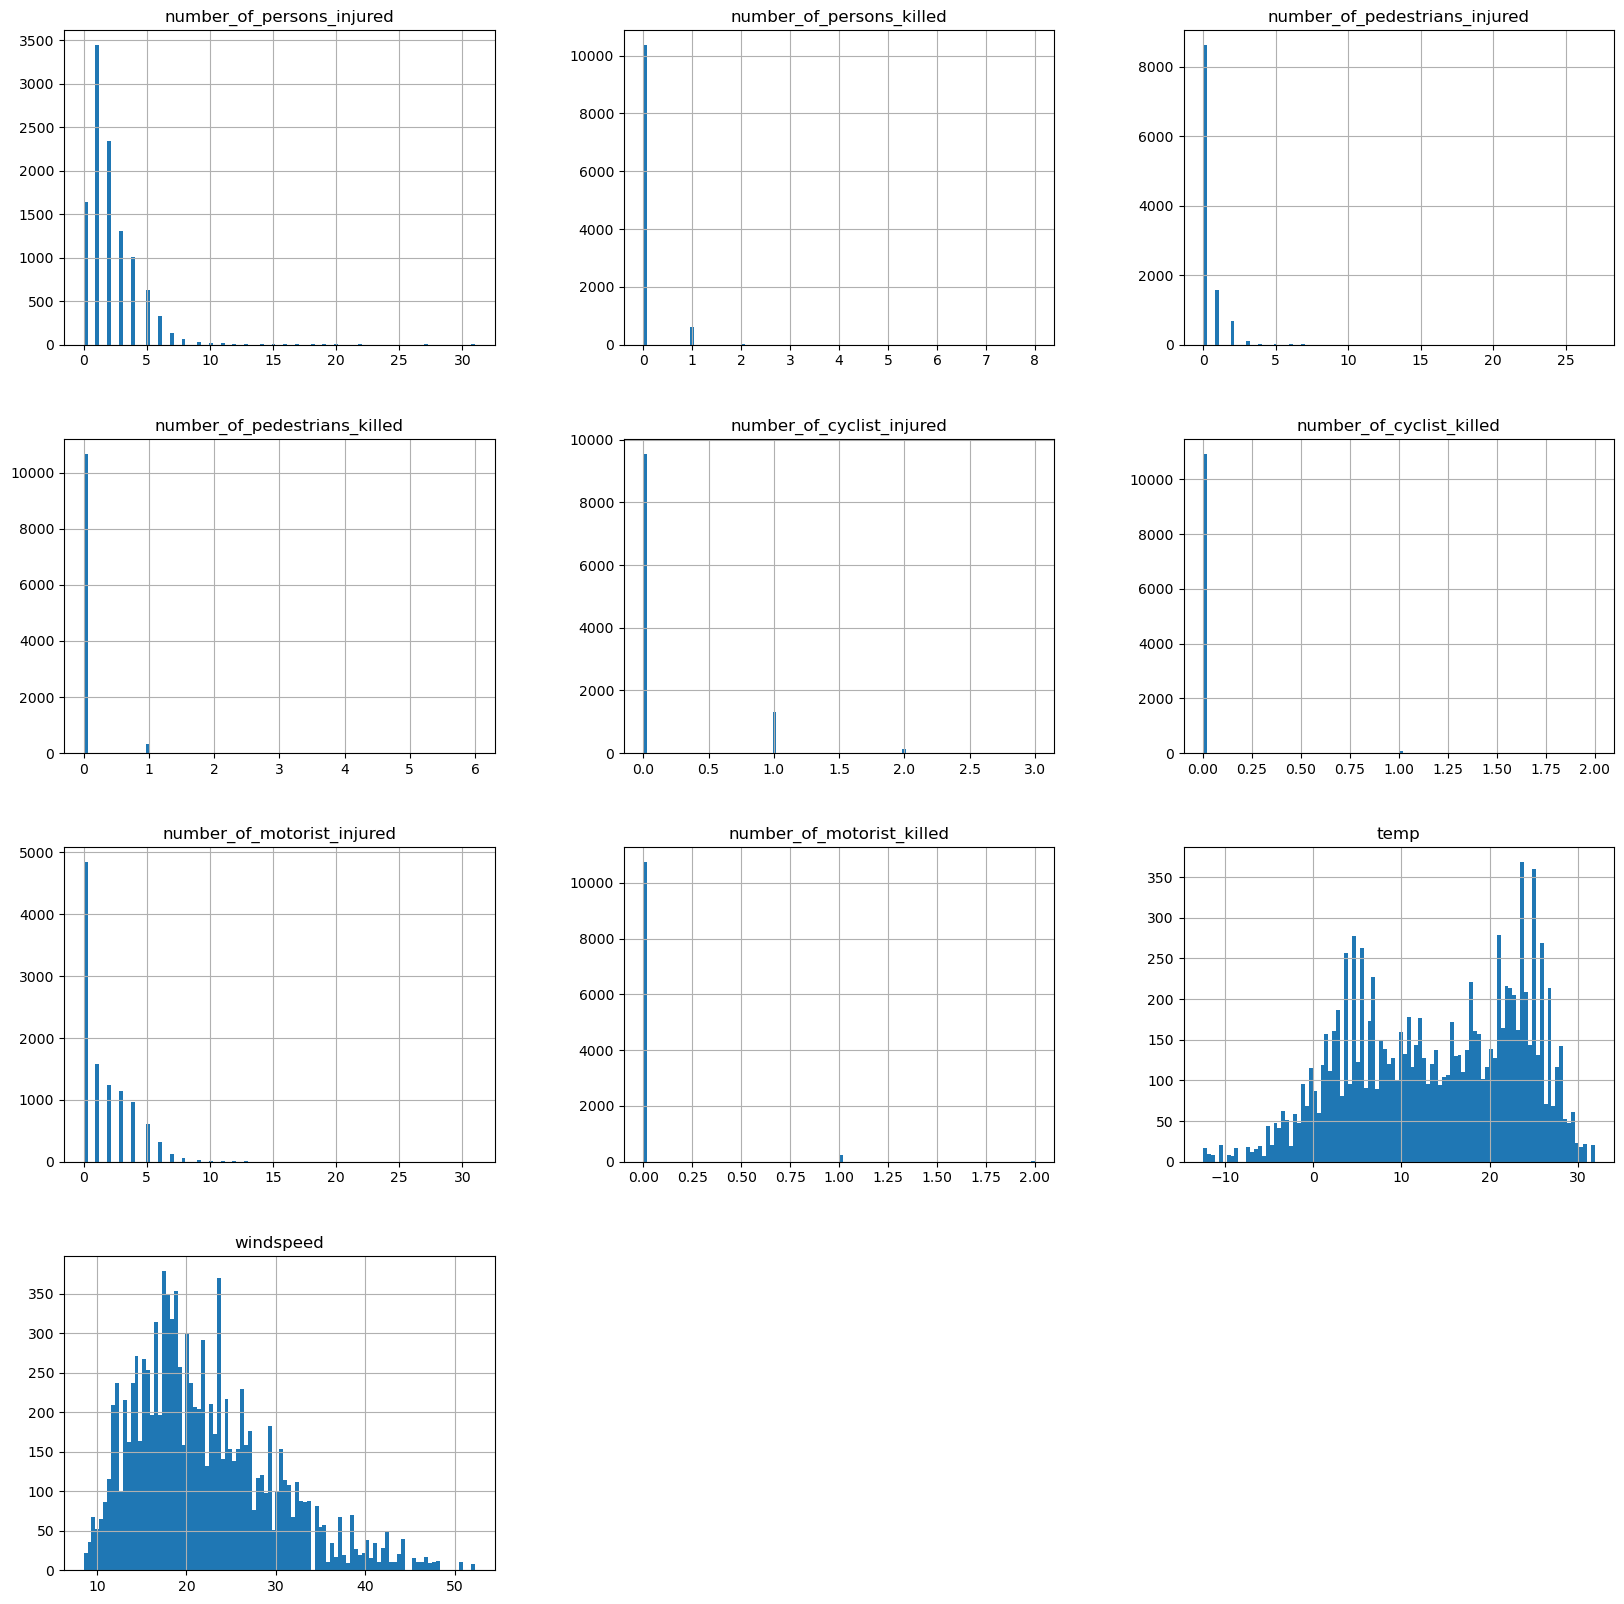

In [41]:
df_subset.hist(bins=100, figsize=(20,20)) 

decided that cases with +9 are outliers and going to be dropped 

In [43]:
df_subset=df_subset[df_subset['total_persons_injured']<9.0]
df_subset

KeyError: 'total_persons_injured'

trying look for patterns related to weather conditions for the following :

In [46]:
# Count 'Unspecified' entries in primary_contributing_factor by weather condition
unspecified_by_weather = df_subset[df_subset['factor_group'] == 'Unspecified/Other'].groupby('weather_conditions').size()


KeyError: 'factor_group'

In [48]:
# Calculate total cases by weather condition
total_by_weather = df_subset.groupby('weather_conditions').size()
percentage_unspecified_by_weather = (unspecified_by_weather / total_by_weather) * 100
print(percentage_unspecified_by_weather)


KeyError: 'weather_conditions'

In [ ]:
import matplotlib.pyplot as plt

# Plot the percentage of 'Unspecified' entries by weather condition
percentage_unspecified_by_weather.plot(kind='bar')
plt.title("Percentage of 'Unspecified' Contributing Factor by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Percentage of 'Unspecified'")
plt.show()


nothing could be concluded


In [52]:
# Count 'Driver Behavior' entries in primary_contributing_factor by weather condition
driver_by_weather = df_subset[df_subset['factor_group'] == 'Driver Behavior'].groupby('weather_conditions').size()


KeyError: 'factor_group'

In [54]:
# Calculate total cases by weather condition
total_by_weather = df_subset.groupby('weather_conditions').size()
percentage_driver_by_weather = (driver_by_weather / total_by_weather) * 100
print(percentage_driver_by_weather)


KeyError: 'weather_conditions'

In [56]:
import matplotlib.pyplot as plt

# Plot the percentage of 'driver behavior' entries by weather condition
percentage_driver_by_weather.plot(kind='bar')
plt.title("Percentage of 'Driver Behavior' Contributing Factor by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Percentage of 'Driver Behavior'")
plt.show()


NameError: name 'percentage_driver_by_weather' is not defined

rain could be a factor to consider

In [59]:
# Count 'Environmental Factors' entries in primary_contributing_factor by weather condition
Environmental_by_weather = df_subset[df_subset['factor_group'] == 'Environmental Factors'].groupby('weather_conditions').size()


KeyError: 'factor_group'

In [61]:
# Calculate total cases by weather condition
total_by_weather = df_subset.groupby('weather_conditions').size()
percentage_Environmental_by_weather = (Environmental_by_weather / total_by_weather) * 100
print(percentage_Environmental_by_weather)


KeyError: 'weather_conditions'

In [63]:
import matplotlib.pyplot as plt

# Plot the percentage of 'Environmental' entries by weather condition
percentage_Environmental_by_weather.plot(kind='bar')
plt.title("Percentage of ' Environmental' Contributing Factor by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Percentage of Environmental")
plt.show()


NameError: name 'percentage_Environmental_by_weather' is not defined

snow is defentialy a factor 

In [66]:
# Suppress the SettingWithCopyWarning by using .loc
df_subset.loc[:, 'time'] = pd.to_datetime(df_subset['time'], format='%H:%M:%S', errors='coerce').dt.time
df_subset.loc[:, 'hour'] = pd.to_datetime(df_subset['time'], format='%H:%M:%S', errors='coerce').dt.hour


KeyError: 'time'

In [68]:
# Convert 'time' to datetime with explicit format and use .loc to avoid SettingWithCopyWarning
df_subset.loc[:, 'time'] = pd.to_datetime(df_subset['time'], format='%H:%M:%S', errors='coerce').dt.time
df_subset.loc[:, 'hour'] = pd.to_datetime(df_subset['time'], format='%H:%M:%S', errors='coerce').dt.hour


KeyError: 'time'

In [70]:
# Use .loc to suppress SettingWithCopyWarning when creating the 'hour' and 'time_bin' columns
df_subset.loc[:, 'hour'] = pd.to_datetime(df_subset['time'], format='%H:%M:%S', errors='coerce').dt.hour
df_subset.loc[:, 'time_bin'] = pd.cut(df_subset['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)
# Display the first few rows of df_subset with 'time', 'hour', and 'time_bin' columns
print(df_subset[['time', 'hour', 'time_bin']].head())



KeyError: 'time'

In [72]:
df_subset.drop(columns="time")

KeyError: "['time'] not found in axis"

trying to find a relationship between time and # of accidants 

In [74]:
# Count the number of incidents in each 'time_bin'
time_bin_counts = df_subset['time_bin'].value_counts()

# Find the time bin with the highest number of incidents
highest_time_bin = time_bin_counts.idxmax()
highest_count = time_bin_counts.max()

print(f"Time Bin with the highest incidents: {highest_time_bin}")
print(f"Number of incidents in this time bin: {highest_count}")
print("\nCounts for all time bins:")
print(time_bin_counts)


KeyError: 'time_bin'

nothing that could be helpful was found

In [77]:
df_subset.drop(columns="time")

KeyError: "['time'] not found in axis"

In [79]:
df_subset.to_csv('modified_df_subset.csv', index=False)
